# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
%matplotlib inline

In [2]:
pr = Project("damask_proj")

In [3]:
pr.remove_jobs(silently=True) # remove the old or existing folder

0it [00:00, ?it/s]

## Creating the Damask job

In [4]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

In [5]:
grains=8;grids=16 # defines the number of grains and grids

### Homogenization

In [6]:
homogenization = pr.create.DAMASK.homogenization(method='SX', 
                                                 parameters={'N_constituents': 1,
                                                             "mechanical": {"type": "pass"}})

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/project.py:87: UserWarning: Setting homogenization via project creator is deprecated. Use job.set_homogenization instead
  warnings.warn(


In [7]:
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

### Elasticity

In [8]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

### Plasticity

In [9]:
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12],a_sl=[2.25],
                                            atol_xi=1.0,dot_gamma_0_sl=[0.001],
                                            h_0_sl_sl=[75.0e6],
                                            h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=[20],
                                            output=['xi_sl'],
                                            xi_0_sl=[31.0e6],
                                            xi_inf_sl=[63.0e6]
                                           )  

### Phase

In [10]:
phase = pr.continuum.damask.Phase(composition='Aluminum', elasticity=elasticity, plasticity=plasticity)

### Rotation

In [11]:
rotation = pr.continuum.damask.Rotation(shape=grains)

### Material

In [12]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [13]:
job.material = material

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:179: UserWarning: Setting material via project creator is deprecated. Use job.set_material instead
  warnings.warn(


### Grid

In [14]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, spatial_discretization=grids, num_grains=grains)

In [15]:
job.grid = grid

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:227: UserWarning: Setting grid via project creator is deprecated. Use job.set_grid instead
  warnings.warn(


### Loading

In [16]:
load_step =[{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [17]:
solver = job.list_solvers()[0]

In [18]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:238: UserWarning: Setting loading via project creator is deprecated. Use job.set_loading instead
  warnings.warn(


## Runing the job

In [19]:
job.run()

The job damask_job was saved and received the ID: 8156


In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,8156,finished,None,damask_job,/damask_job,None,/home/jovyan/dev/pyiron_continuum/notebooks/damask/damask_proj/,2024-09-03 09:43:28.081760,2024-09-03 09:45:52.564986,144.0,pyiron@96412410cd51#1,DAMASK,0.4,None,None


## Post-processing

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_z$$_z$', ylabel='$\\sigma_z$$_z$(Pa)'>)

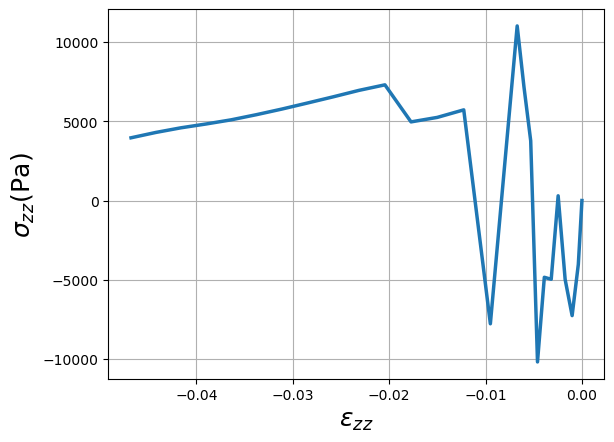

In [21]:
job.plot_stress_strain(component='zz')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_{vM}$', ylabel='$\\sigma_{vM}$ (Pa)'>)

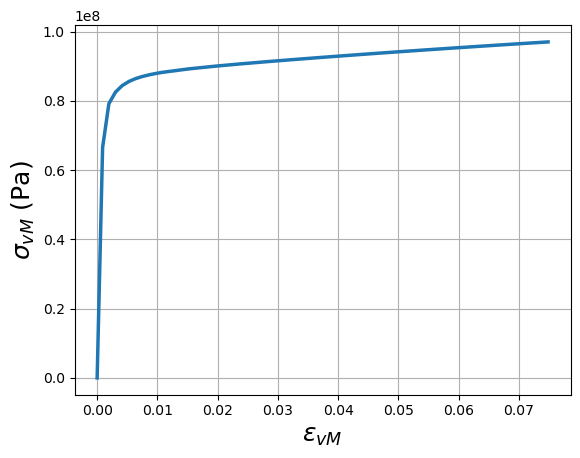

In [22]:
job.plot_stress_strain(von_mises=True)

In [23]:
job.output.stress

array([[[-1.87757547e-05,  1.77611174e-06,  3.34857669e-06],
        [ 1.77611174e-06, -1.52555136e-05,  1.78961239e-06],
        [ 3.34857669e-06,  1.78961239e-06, -1.85102873e-05]],

       [[ 6.63949732e+07, -5.15741707e+05, -6.79356803e+05],
        [-5.15741707e+05, -2.37521863e+03, -9.48843800e+05],
        [-6.79356803e+05, -9.48843800e+05, -4.02746296e+03]],

       [[ 7.72030186e+07, -1.66544611e+06, -9.74906976e+05],
        [-1.66544611e+06, -7.08371445e+03, -4.10139615e+06],
        [-9.74906976e+05, -4.10139615e+06, -7.26036657e+03]],

       [[ 7.87922571e+07, -1.61747185e+06, -2.02832306e+06],
        [-1.61747185e+06, -6.99188195e+03, -5.27404703e+06],
        [-2.02832306e+06, -5.27404703e+06, -4.97833802e+03]],

       [[ 7.94752046e+07, -1.40565342e+06, -2.97447768e+06],
        [-1.40565342e+06, -4.19642706e+03, -5.77130074e+06],
        [-2.97447768e+06, -5.77130074e+06,  2.96364633e+02]],

       [[ 7.98633495e+07, -1.28821085e+06, -3.62993854e+06],
        [-1.28